In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log

$$
entropy=-\sum_{i=1}^NP_i\cdot\log_2P_i
$$

In [27]:
def entropy(arr):
    length = sum(arr)
    probs =  [i / length for i in arr]
    entropy = sum([-i * log(i) for i in probs])
    return entropy

entropy([8, 0.1e-100])

2.933006699175981e-100

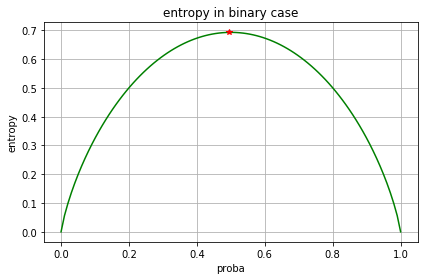

In [115]:
x = np.linspace(0.1e-10, 1 - 0.1e-10, 100)
data =  - x * np.log(x) - (1 - x) * np.log(1 - x)
plt.plot(x, data, "g-")
mask = np.argmax(data)
plt.plot(x[mask], data[mask], "*r")
plt.grid()
plt.ylabel("entropy")
plt.xlabel("proba")
plt.title("entropy in binary case")
plt.tight_layout()

$$
gini = 1 - \sum_{i=1}^N\cdot P_i^2
$$

In [22]:
def gini(arr):
    length = sum(arr)
    probs =  [i / length for i in arr]
    gini = 1 - sum([i ** 2 for i in probs])
    return gini

gini([19, 0, 0])

0.0

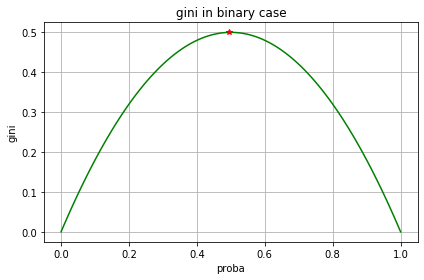

In [222]:
x = np.linspace(0.1e-10, 1 - 0.1e-10, 100)
data = 1 - ((1 - x) ** 2 + x ** 2)
mask = np.argmax(data)
plt.plot(x, data, "g-")
plt.plot(x[mask], data[mask], "*r")
plt.grid()
plt.ylabel("gini")
plt.xlabel("proba")
plt.title("gini in binary case")
plt.tight_layout()

In [48]:
data = [
    {"level":"Senior", "lang":"Java",   "Instagram":"Yes", "status":"True" },
    {"level":"Senior", "lang":"Java",   "Instagram":"No",  "status":"False"},
    {"level":"Mid",    "lang":"Python", "Instagram":"No",  "status":"True" },
    {"level":"Junior", "lang":"Python", "Instagram":"No",  "status":"False"},
    {"level":"Junior", "lang":"R",      "Instagram":"No",  "status":"False"},
    {"level":"Junior", "lang":"R",      "Instagram":"Yes", "status":"True" },
    {"level":"Mid",    "lang":"R",      "Instagram":"Yes", "status":"True" },
    {"level":"Senior", "lang":"Python", "Instagram":"No",  "status":"False"},
    {"level":"Senior", "lang":"R",      "Instagram":"No",  "status":"False"},
    {"level":"Junior", "lang":"Python", "Instagram":"Yes", "status":"False"},
    {"level":"Senior", "lang":"Python", "Instagram":"Yes", "status":"True" },
    {"level":"Mid",    "lang":"Python", "Instagram":"No",  "status":"False"},
]
df = pd.DataFrame(data)
df

,Instagram,lang,level,status
0,Yes,Java,Senior,True
1,No,Java,Senior,False
2,No,Python,Mid,True
3,No,Python,Junior,False
4,No,R,Junior,False
5,Yes,R,Junior,True
6,Yes,R,Mid,True
7,No,Python,Senior,False
8,No,R,Senior,False
9,Yes,Python,Junior,False


In [175]:
# split by Instagram
df.sort_values("Instagram")

,Instagram,lang,level,status
1,No,Java,Senior,False
2,No,Python,Mid,True
3,No,Python,Junior,False
4,No,R,Junior,False
7,No,Python,Senior,False
8,No,R,Senior,False
11,No,Python,Mid,False
0,Yes,Java,Senior,True
5,Yes,R,Junior,True
6,Yes,R,Mid,True


In [263]:
yes_true = len(df[(df["Instagram"] == "Yes") & (df["status"] == "True")])
yes_false = len(df[(df["Instagram"] == "Yes") & (df["status"] == "False")])

no_true = len(df[(df["Instagram"] == "No") & (df["status"] == "True")])
no_false = len(df[(df["Instagram"] == "No") & (df["status"] == "False")])

print(f"yes_true = {yes_true}, yes_false = {yes_false}, no_true = {no_true}, no_false = {no_false}")
print(f"entropy/yes = {entropy([yes_true, yes_false])}, entropy/no = {entropy([no_true, no_false])}")
print(f"gini/yes = {gini([yes_true, yes_false])}, gini/no = {gini([no_true, no_false])}")
total_entropy = entropy([yes_true, yes_false]) * (yes_true + yes_false) / (yes_true + yes_false + no_true + no_false)
total_entropy += entropy([no_true, no_false]) * (no_true + no_false) / (yes_true + yes_false + no_true + no_false)
print(f"total entropy = {total_entropy}")

yes_true = 4, yes_false = 1, no_true = 1, no_false = 6
entropy/yes = 0.5004024235381879, entropy/no = 0.410116318288409
gini/yes = 0.31999999999999984, gini/no = 0.24489795918367352
total entropy = 0.4477355288091502


In [147]:
# split by lang
df.sort_values("lang")

,Instagram,lang,level,status
0,Yes,Java,Senior,True
1,No,Java,Senior,False
2,No,Python,Mid,True
3,No,Python,Junior,False
7,No,Python,Senior,False
9,Yes,Python,Junior,False
10,Yes,Python,Senior,True
11,No,Python,Mid,False
4,No,R,Junior,False
5,Yes,R,Junior,True


In [266]:
python_true = len(df[(df["lang"] == "Python") & (df["status"] == "True")])
python_false = len(df[(df["lang"] == "Python") & (df["status"] == "False")])

r_true = len(df[(df["lang"] == "R") & (df["status"] == "True")])
r_false = len(df[(df["lang"] == "R") & (df["status"] == "False")])

java_true = len(df[(df["lang"] == "Java") & (df["status"] == "True")])
java_false = len(df[(df["lang"] == "Java") & (df["status"] == "False")])

print(f"python_true = {python_true}, python_false = {python_false}, r_true = {r_true}, r_false = {r_false}, java_true = {java_true}, java_false = {java_false}")
print(f"entropy/python = {entropy([python_true, python_false])}, entropy/r = {entropy([r_true, r_false])}, entropy/java = {entropy([java_true, java_false])}")
print(f"gini/python = {gini([python_true, python_false])}, gini/r = {gini([r_true, r_false])}, gini/java = {gini([java_true, java_false])}")
total_entropy = entropy([python_true, python_false]) * (python_true + python_false) / (python_true + python_false + r_true + r_false + java_true + java_false)
total_entropy += entropy([r_true, r_false]) * (r_true + r_false) / (python_true + python_false + r_true + r_false + java_true + java_false)
total_entropy += entropy([java_true, java_false]) * (java_true + java_false) / (python_true + python_false + r_true + r_false + java_true + java_false)
print(f"total entropy = {total_entropy}")

python_true = 2, python_false = 4, r_true = 2, r_false = 2, java_true = 1, java_false = 1
entropy/python = 0.6365141682948128, entropy/r = 0.6931471805599453, entropy/java = 0.6931471805599453
gini/python = 0.4444444444444444, gini/r = 0.5, gini/java = 0.5
total entropy = 0.664830674427379


In [148]:
# split by level
df.sort_values("level")

,Instagram,lang,level,status
3,No,Python,Junior,False
4,No,R,Junior,False
5,Yes,R,Junior,True
9,Yes,Python,Junior,False
2,No,Python,Mid,True
6,Yes,R,Mid,True
11,No,Python,Mid,False
0,Yes,Java,Senior,True
1,No,Java,Senior,False
7,No,Python,Senior,False


In [267]:
junior_true = len(df[(df["level"] == "Junior") & (df["status"] == "True")])
junior_false = len(df[(df["level"] == "Junior") & (df["status"] == "False")])

mid_true = len(df[(df["level"] == "Mid") & (df["status"] == "True")])
mid_false = len(df[(df["level"] == "Mid") & (df["status"] == "False")])

senior_true = len(df[(df["level"] == "Senior") & (df["status"] == "True")])
senior_false = len(df[(df["level"] == "Senior") & (df["status"] == "False")])

print(f"junior_true = {junior_true}, junior_false = {junior_false}, mid_true = {mid_true}, mid_false = {mid_false}, senior_true = {senior_true}, senior_false = {senior_false}")
print(f"entropy/junior = {entropy([junior_true, junior_false])}, entropy/mid = {entropy([mid_true, mid_false])}, entropy/senior = {entropy([senior_true, senior_false])}")
print(f"gini/junior = {gini([junior_true, junior_false])}, gini/mid = {gini([mid_true, mid_false])}, gini/senior = {gini([senior_true, senior_false])}")
total_entropy = entropy([junior_true, junior_false]) * (junior_true + junior_false) / (junior_true + junior_false + mid_true + mid_false + senior_true + senior_false)
total_entropy += entropy([mid_true, mid_false]) * (mid_true + mid_false) / (junior_true + junior_false + mid_true + mid_false + senior_true + senior_false)
total_entropy += entropy([senior_true, senior_false]) * (senior_true + senior_false) / (junior_true + junior_false + mid_true + mid_false + senior_true + senior_false)
print(f"total entropy = {total_entropy}")

junior_true = 1, junior_false = 3, mid_true = 2, mid_false = 1, senior_true = 2, senior_false = 3
entropy/junior = 0.5623351446188083, entropy/mid = 0.6365141682948128, entropy/senior = 0.6730116670092565
gini/junior = 0.375, gini/mid = 0.4444444444444444, gini/senior = 0.48
total entropy = 0.6269951182004961


In [1]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from IPython.display import Image

iris = load_iris()
data = iris.data
target = iris.target

model = DecisionTreeClassifier(criterion="entropy")
model.fit(data, target);

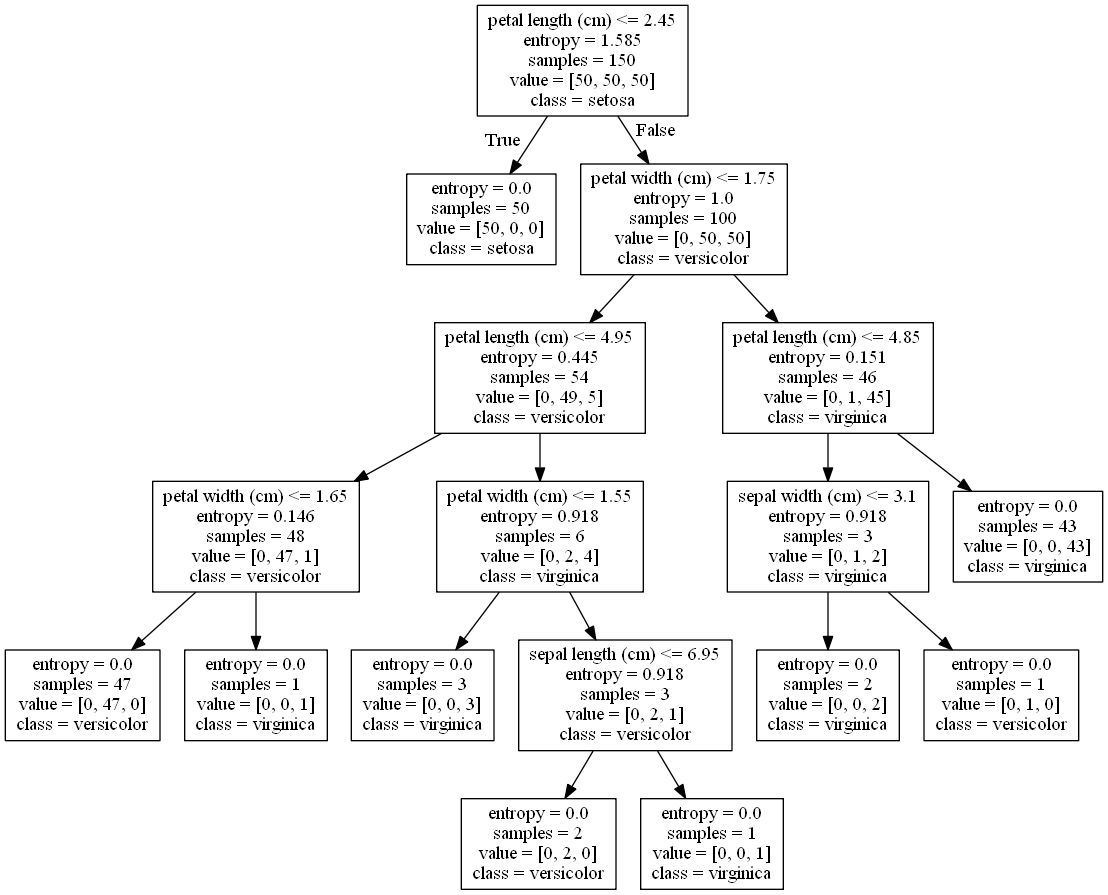

In [5]:
dot_data = export_graphviz(model, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# then add this in the path enviroment variable

In [51]:
df['Instagram'] = df['Instagram'].replace(["Yes", "No"], [1, 0])
df["lang"] = df["lang"].replace(["Java", "Python", "R"], [1, 2, 3])
df["level"] = df["level"].replace(["Senior", "Mid", "Junior"], [3, 2, 1]) # HW !!
df["status"] = df["status"].replace(["True", "False"], [1, 0])
df

,Instagram,lang,level,status
0,1,1,3,1
1,0,1,3,0
2,0,2,2,1
3,0,2,1,0
4,0,3,1,0
5,1,3,1,1
6,1,3,2,1
7,0,2,3,0
8,0,3,3,0
9,1,2,1,0


In [52]:
model = DecisionTreeClassifier()
model.fit(df.iloc[:, :3], df.iloc[:,3]);

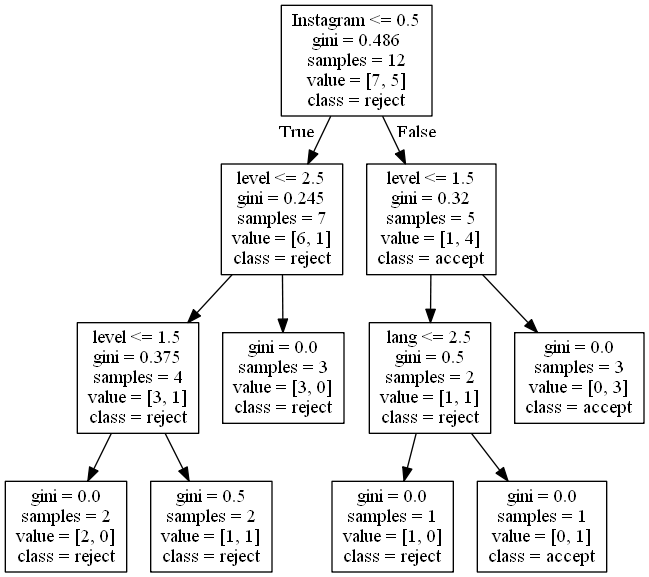

In [54]:
dot_data = export_graphviz(model, feature_names=df.columns[:-1], class_names=["reject", "accept"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

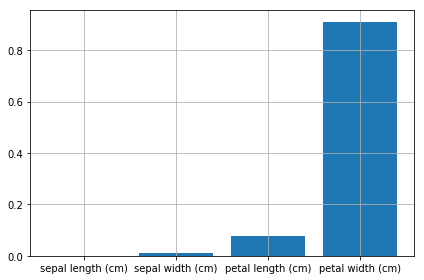

In [12]:
plt.bar(range(4), model.feature_importances_, tick_label=iris.feature_names)
plt.grid()
plt.tight_layout()

---

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digit = load_digits()
data = digit.data
target = digit.target

x_train, x_test, y_train, y_test = train_test_split(data, target)

model = DecisionTreeClassifier(max_depth=7).fit(x_train, y_train)
model.score(x_test, y_test)

0.8488888888888889

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5).fit(load_iris().data, load_iris().target)
# model.score(x_test, y_test)

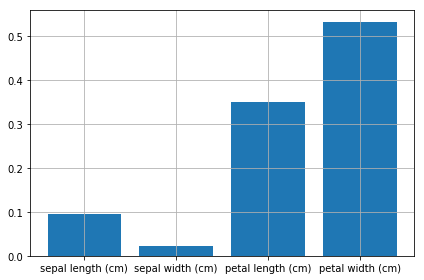

In [28]:
plt.bar(range(4), model.feature_importances_, tick_label=iris.feature_names)
plt.grid()
plt.tight_layout()

---

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

data = load_digits()
features = data.data
target = data.target

x_train, x_test, y_train, y_test = train_test_split(features, target)
poly_x_train = PolynomialFeatures().fit_transform(x_train)

model1 = RandomForestClassifier().fit(x_train, y_train)
model2 = RandomForestClassifier().fit(poly_x_train, y_train)

print(model1.score(x_test, y_test))
poly_x_test = PolynomialFeatures().fit_transform(x_test)
print(model2.score(poly_x_test, y_test))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9488888888888889
0.9555555555555556


In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=40, max_depth=31), features, target, cv=5).mean()

0.9349461490217891

In [38]:
x_train.shape

(1347, 64)

In [39]:
poly_x_train.shape

(1347, 2145)

---

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = np.random.randint(0, 5, 10).reshape((-1,1))
ss = StandardScaler().fit(data)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
print(ss.mean_)
print(ss.scale_)
ss.transform(data)

[1.9]
[1.44568323]


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.06917145],
       [ 1.45260037],
       [ 0.76088591],
       [-1.31425748],
       [-0.62254302],
       [ 0.76088591],
       [ 1.45260037],
       [-1.31425748],
       [-0.62254302],
       [-0.62254302]])

In [54]:
data

array([[2],
       [4],
       [3],
       [0],
       [1],
       [3],
       [4],
       [0],
       [1],
       [1]])

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(), verbose=1,
             param_grid={"n_estimators":range(5, 50, 5), "max_depth":range(5, 50, 2)})
data = PolynomialFeatures().fit_transform(features)
grid.fit(data, target)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 207 candidates, totalling 621 fits


[Parallel(n_jobs=1)]: Done 621 out of 621 | elapsed:  5.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(5, 50, 5), 'max_depth': range(5, 50, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [57]:
grid.best_params_

{'max_depth': 31, 'n_estimators': 40}

In [58]:
grid.best_score_

0.9360044518642181

In [ ]:
1000
200 200 200 200 200

---

In [75]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

data, label = make_classification(n_samples=300, n_features=10, n_informative=2, n_classes=2)

In [86]:
model = RandomForestClassifier()
param = {
    "n_estimators":range(5, 50, 5),
    "max_depth":range(5, 50, 2)
}
grid = GridSearchCV(estimator=model, param_grid=param)
grid.fit(data, label);

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


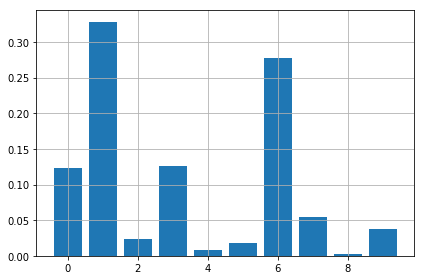

In [87]:
data4bar = grid.best_estimator_.feature_importances_ 
plt.bar(range(len(data4bar)), data4bar)
plt.grid()
plt.tight_layout()

In [88]:
grid.best_params_

{'max_depth': 15, 'n_estimators': 5}

In [89]:
grid.best_score_

0.9066666666666666

---

In [ ]:
extended_data  = PolynomialFeatures().fit()